# Loan Default Prediction - Part 05 - Decision Trees

This is an exploratory project for me to apply what I have learned in the Data Science and Machine Learning courses that I took this year. The data is from a Kaggle competition [Loan Default Prediction](https://www.kaggle.com/c/loan-default-prediction). 

This is Part 05 of the project: Decision Trees.

In this part, I will move on from Logistic Regression and try a different model, Decision Tree. I will first load the data. Models based on decision trees are usually less sensitive to the magnitude of data, so I will try both the original and the normalized data.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import time
import project_utils as utils

In [2]:
# Load the training data (imputed but not normalized) from the CSV file

df, X, y = utils.load_csv('train_v2_preprocessed.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 1789 entries, f1_0 to loss
dtypes: float64(1789)
memory usage: 1.4 GB


In [3]:
# Separate training and validation sets

from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
X_train, y_train, X_valid, y_valid = utils.split_data(kf, X, y)

## Decision Tree (Vanilla Version)

I will first try using all default setting and train a Decision Tree model using the [sklearn.tree.DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) library.

Time elapsed (Training): 160.2880 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 1.000000
ROCAUC Score (Training): 1.000000
PRAUC Score (Training): 0.000000
Accuracy (Validation): 0.825219
ROCAUC Score (Validation): 0.521713
PRAUC Score (Validation): 0.085221
Time elapsed (Evaluation): 1.2956 s


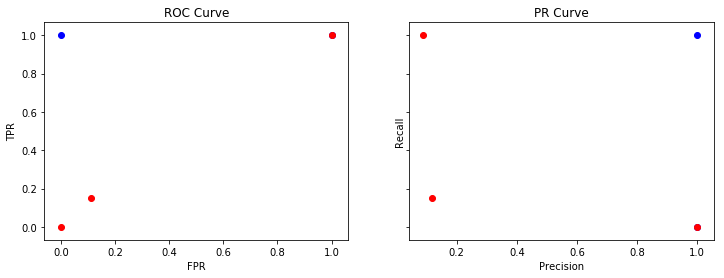

In [4]:
from sklearn import tree
import time

clf = tree.DecisionTreeClassifier()
fit_time = utils.train_model(clf, X_train, y_train)
acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)

I got perfect scores on the training set. Decision-tree-based models can perform very well on the training set because they can learn a rule for each training example they encounter. On the validation set, the scores are mediocre. 

## Normalized Data

Now let's see how it does on the normalized data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 1789 entries, f3 to loss
dtypes: float64(1789)
memory usage: 1.4 GB
Time elapsed (Training): 160.0650 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 1.000000
ROCAUC Score (Training): 1.000000
PRAUC Score (Training): 0.000000
Accuracy (Validation): 0.823039
ROCAUC Score (Validation): 0.521974
PRAUC Score (Validation): 0.086509
Time elapsed (Evaluation): 1.2566 s


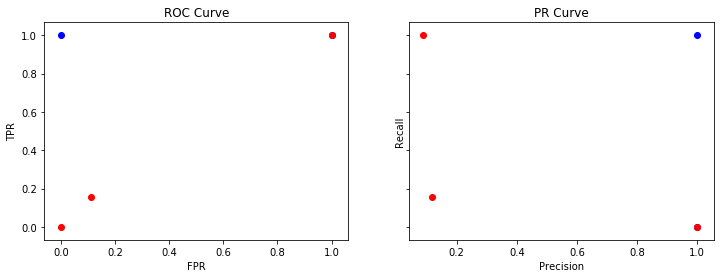

In [5]:
# Load the training data (imputed and normalized) from the CSV file
df, X, y = utils.load_csv('train_v2_preprocessed_normalized.csv')

# Separate training and validation sets
X_train, y_train, X_valid, y_valid = utils.split_data(kf, X, y)

# Train the model and evaluate
clf = tree.DecisionTreeClassifier()
fit_time = utils.train_model(clf, X_train, y_train)
acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)

I still got perfect scores on the training set. The scores on the validation sets are somewhat worse than those from the original data. 

## Class Weights 

As my dataset has unbalanced classes, I would also like to see the impact of adding class weights.

In [6]:
# Define weights for unbalanced classes

class_weight = {0: 1., 1: 10.}

Time elapsed (Training): 88.4458 s
DecisionTreeClassifier(class_weight={0: 1.0, 1: 10.0}, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 1.000000
ROCAUC Score (Training): 1.000000
PRAUC Score (Training): 0.000000
Accuracy (Validation): 0.833942
ROCAUC Score (Validation): 0.518968
PRAUC Score (Validation): 0.077215
Time elapsed (Evaluation): 1.2386 s


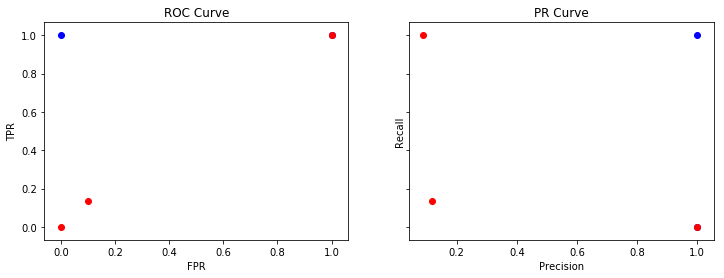

In [7]:
clf = tree.DecisionTreeClassifier(class_weight=class_weight)
fit_time = utils.train_model(clf, X_train, y_train)
acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)

The accuracy improved from 0.825 to 0.834, ROCAUC decreased from 0.523 to 0.517, while PRAUC decreased from 0.087 to 0.074. Not a significant change.

We can see that there is overfitting as the training set always get a perfect score but the validation set doesn't perform well. There are a few hyperparameters we can set for the Decision Tree in order to control how it grows and limit the extent of overfitting on the training data.

## Max Depth

Setting __max_depth__ allows us to control the depth of the trees in a Decision Tree model. The tree stops growing after it reaches the maximum depth.

In [8]:
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

----- k = 1 -----
Time elapsed (Training): 4.6475 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.906099
ROCAUC Score (Training): 0.598906
PRAUC Score (Training): 0.317086
Accuracy (Validation): 0.911827
ROCAUC Score (Validation): 0.607797
PRAUC Score (Validation): 0.321483
Time elapsed (Evaluation): 1.0986 s


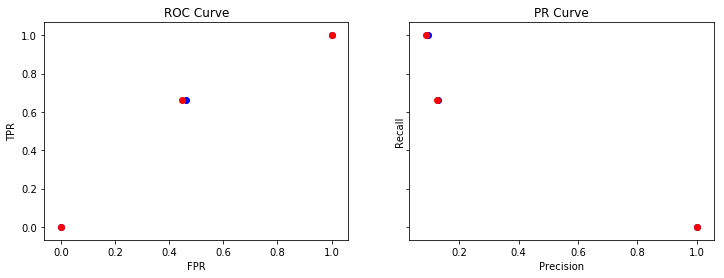

----- k = 2 -----
Time elapsed (Training): 9.0371 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.906099
ROCAUC Score (Training): 0.630998
PRAUC Score (Training): 0.207024
Accuracy (Validation): 0.911827
ROCAUC Score (Validation): 0.639237
PRAUC Score (Validation): 0.188967
Time elapsed (Evaluation): 1.1506 s


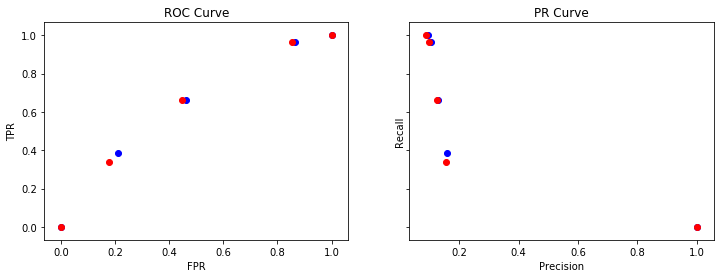

----- k = 3 -----
Time elapsed (Training): 13.4697 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.906300
ROCAUC Score (Training): 0.646182
PRAUC Score (Training): 0.176336
Accuracy (Validation): 0.911970
ROCAUC Score (Validation): 0.647733
PRAUC Score (Validation): 0.134169
Time elapsed (Evaluation): 1.1146 s


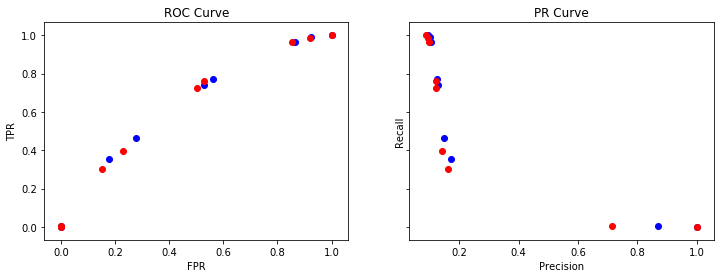

----- k = 4 -----
Time elapsed (Training): 18.0882 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.906383
ROCAUC Score (Training): 0.662418
PRAUC Score (Training): 0.168135
Accuracy (Validation): 0.912017
ROCAUC Score (Validation): 0.646884
PRAUC Score (Validation): 0.137929
Time elapsed (Evaluation): 1.1266 s


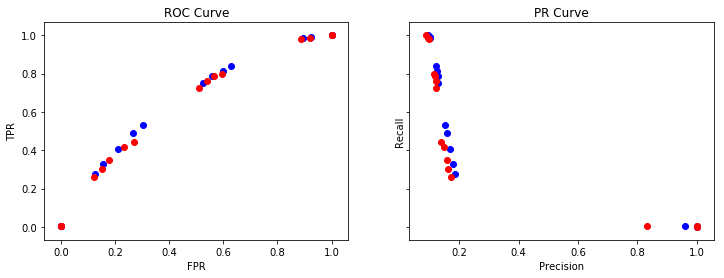

----- k = 5 -----
Time elapsed (Training): 26.9914 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.906573
ROCAUC Score (Training): 0.673382
PRAUC Score (Training): 0.085251
Accuracy (Validation): 0.911780
ROCAUC Score (Validation): 0.653882
PRAUC Score (Validation): 0.058980
Time elapsed (Evaluation): 1.4675 s


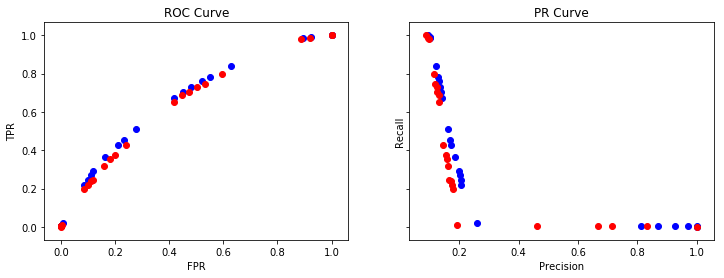

----- k = 6 -----
Time elapsed (Training): 32.3537 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.907071
ROCAUC Score (Training): 0.683001
PRAUC Score (Training): 0.103534
Accuracy (Validation): 0.911543
ROCAUC Score (Validation): 0.659691
PRAUC Score (Validation): 0.059217
Time elapsed (Evaluation): 1.1516 s


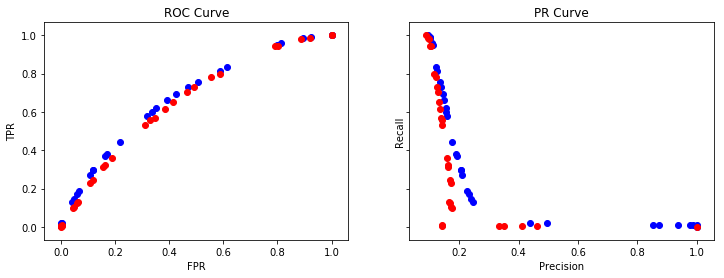

----- k = 7 -----
Time elapsed (Training): 32.4906 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.907640
ROCAUC Score (Training): 0.695737
PRAUC Score (Training): 0.120495
Accuracy (Validation): 0.911069
ROCAUC Score (Validation): 0.662375
PRAUC Score (Validation): 0.058362
Time elapsed (Evaluation): 1.1746 s


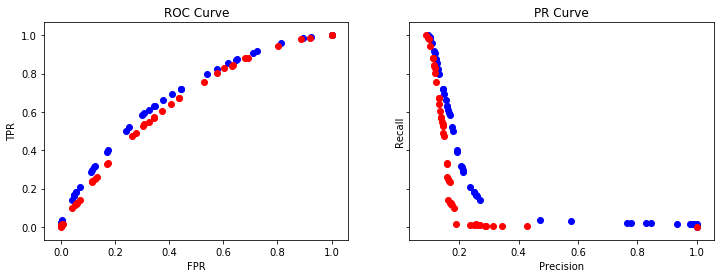

----- k = 8 -----
Time elapsed (Training): 37.5530 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.908766
ROCAUC Score (Training): 0.705474
PRAUC Score (Training): 0.142321
Accuracy (Validation): 0.909742
ROCAUC Score (Validation): 0.663251
PRAUC Score (Validation): 0.061138
Time elapsed (Evaluation): 1.2886 s


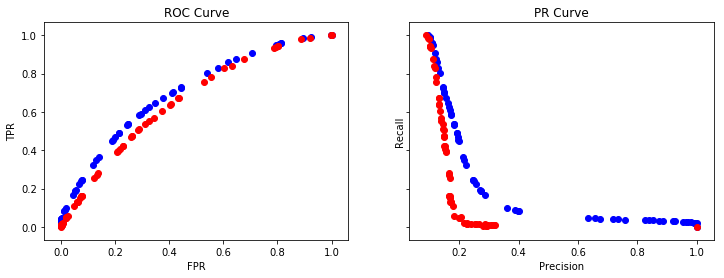

----- k = 9 -----
Time elapsed (Training): 42.1636 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.910674
ROCAUC Score (Training): 0.714159
PRAUC Score (Training): 0.171072
Accuracy (Validation): 0.908414
ROCAUC Score (Validation): 0.660428
PRAUC Score (Validation): 0.058361
Time elapsed (Evaluation): 1.2966 s


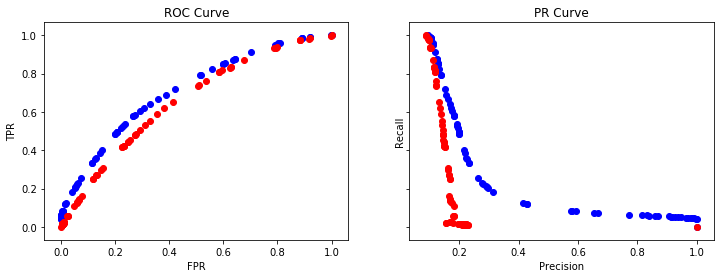

----- k = 10 -----
Time elapsed (Training): 49.7042 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.912783
ROCAUC Score (Training): 0.725360
PRAUC Score (Training): 0.200913
Accuracy (Validation): 0.905760
ROCAUC Score (Validation): 0.656309
PRAUC Score (Validation): 0.058725
Time elapsed (Evaluation): 1.1046 s


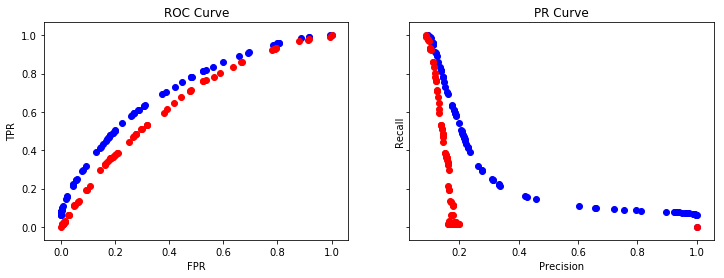

----- k = 11 -----
Time elapsed (Training): 46.4842 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.914762
ROCAUC Score (Training): 0.736857
PRAUC Score (Training): 0.232228
Accuracy (Validation): 0.903911
ROCAUC Score (Validation): 0.650130
PRAUC Score (Validation): 0.096657
Time elapsed (Evaluation): 1.1526 s


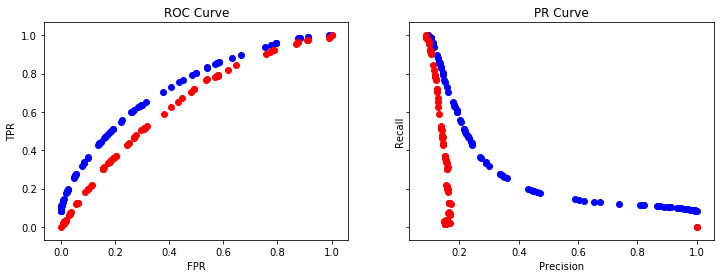

----- k = 12 -----
Time elapsed (Training): 53.6029 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.917228
ROCAUC Score (Training): 0.750362
PRAUC Score (Training): 0.270024
Accuracy (Validation): 0.902584
ROCAUC Score (Validation): 0.648788
PRAUC Score (Validation): 0.092403
Time elapsed (Evaluation): 1.1686 s


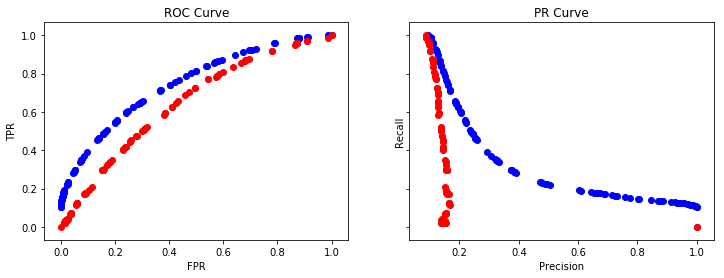

----- k = 13 -----
Time elapsed (Training): 55.0425 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=13,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.921115
ROCAUC Score (Training): 0.761577
PRAUC Score (Training): 0.309659
Accuracy (Validation): 0.899313
ROCAUC Score (Validation): 0.645177
PRAUC Score (Validation): 0.143219
Time elapsed (Evaluation): 1.1666 s


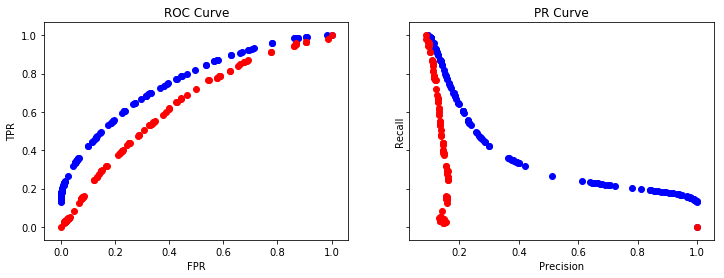

----- k = 14 -----
Time elapsed (Training): 59.5900 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=14,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.925334
ROCAUC Score (Training): 0.777795
PRAUC Score (Training): 0.349993
Accuracy (Validation): 0.894809
ROCAUC Score (Validation): 0.643056
PRAUC Score (Validation): 0.139778
Time elapsed (Evaluation): 1.1316 s


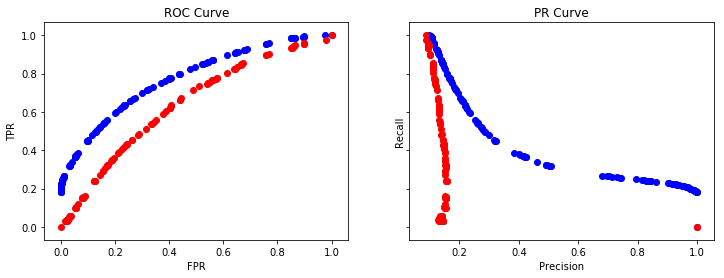

----- k = 15 -----
Time elapsed (Training): 63.3485 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.929625
ROCAUC Score (Training): 0.791303
PRAUC Score (Training): 0.389105
Accuracy (Validation): 0.891159
ROCAUC Score (Validation): 0.637345
PRAUC Score (Validation): 0.119891
Time elapsed (Evaluation): 1.1057 s


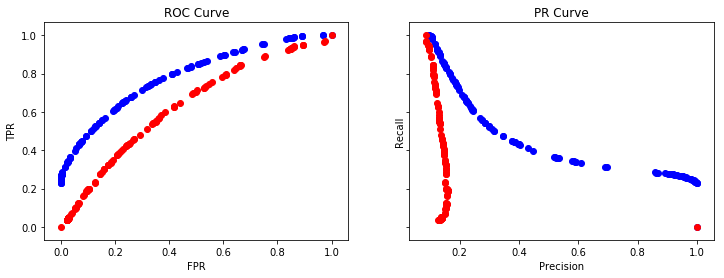

In [9]:
fit_times = []; eval_times = []; acc_scores = []; rocauc_scores = []; prauc_scores = []

for k in ks:
    print('----- k = %d -----' % k)
    clf = tree.DecisionTreeClassifier(max_depth=k)
    fit_time = utils.train_model(clf, X_train, y_train)
    acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)
    fit_times.append(fit_time); eval_times.append(eval_time)
    acc_scores.append(acc_score); rocauc_scores.append(rocauc_score); prauc_scores.append(prauc_score)

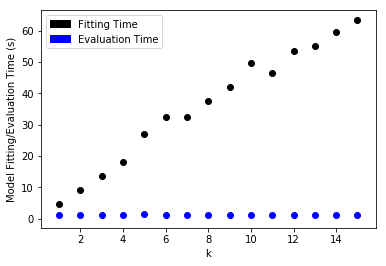

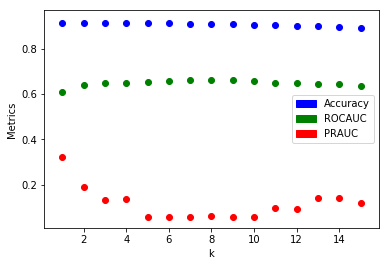

    0_k  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  5_eval_time
0     1    0.911827  0.607797  0.321483    4.647521     1.098649
1     2    0.911827  0.639237  0.188967    9.037121     1.150646
2     3    0.911970  0.647733  0.134169   13.469709     1.114645
3     4    0.912017  0.646884  0.137929   18.088236     1.126641
4     5    0.911780  0.653882  0.058980   26.991403     1.467531
5     6    0.911543  0.659691  0.059217   32.353725     1.151631
6     7    0.911069  0.662375  0.058362   32.490647     1.174640
7     8    0.909742  0.663251  0.061138   37.553034     1.288591
8     9    0.908414  0.660428  0.058361   42.163566     1.296586
9    10    0.905760  0.656309  0.058725   49.704183     1.104648
10   11    0.903911  0.650130  0.096657   46.484192     1.152633
11   12    0.902584  0.648788  0.092403   53.602924     1.168628
12   13    0.899313  0.645177  0.143219   55.042465     1.166628
13   14    0.894809  0.643056  0.139778   59.590030     1.131641
14   15    0.891159  0.63

In [10]:
utils.plot_metrics(ks, 'k', False, fit_times, eval_times, acc_scores, rocauc_scores, prauc_scores)

We can see that overfitting is more pronounced as the __max_depth__ goes up. The best ROCAUC occurs at __max_depth__=7, which is also where the curves of the training and the validation sets start to split. 

## Min Samples Split

Next, I will try __min_samples_split__, which is the minimum number of samples required to split an internal node.

In [11]:
ks = [2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000]

----- k = 2 -----
Time elapsed (Training): 160.0600 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 1.000000
ROCAUC Score (Training): 1.000000
PRAUC Score (Training): 0.000000
Accuracy (Validation): 0.825456
ROCAUC Score (Validation): 0.525971
PRAUC Score (Validation): 0.092181
Time elapsed (Evaluation): 1.3816 s


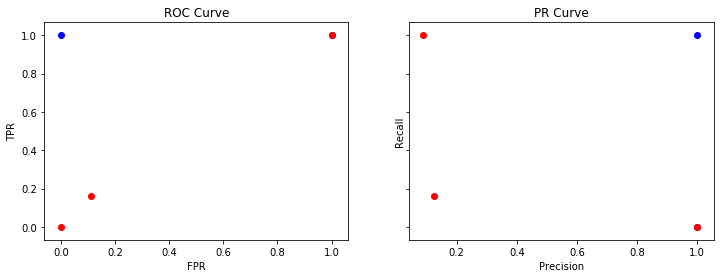

----- k = 5 -----
Time elapsed (Training): 162.3348 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.989665
ROCAUC Score (Training): 0.999245
PRAUC Score (Training): 0.116859
Accuracy (Validation): 0.828869
ROCAUC Score (Validation): 0.524429
PRAUC Score (Validation): 0.077635
Time elapsed (Evaluation): 1.2886 s


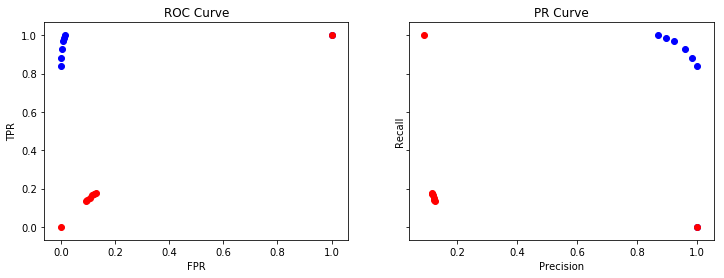

----- k = 10 -----
Time elapsed (Training): 162.8407 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.974791
ROCAUC Score (Training): 0.995293
PRAUC Score (Training): 0.262271
Accuracy (Validation): 0.833041
ROCAUC Score (Validation): 0.526326
PRAUC Score (Validation): 0.063187
Time elapsed (Evaluation): 1.3306 s


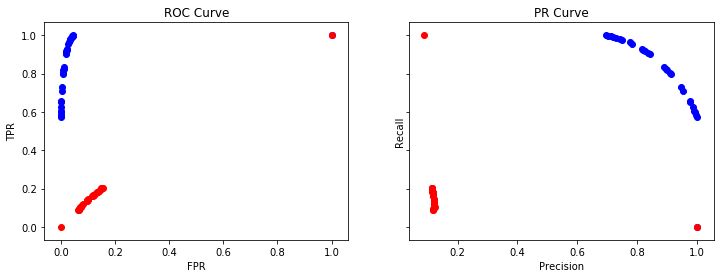

----- k = 20 -----
Time elapsed (Training): 169.4370 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.958673
ROCAUC Score (Training): 0.986898
PRAUC Score (Training): 0.350603
Accuracy (Validation): 0.838730
ROCAUC Score (Validation): 0.534205
PRAUC Score (Validation): 0.075735
Time elapsed (Evaluation): 1.2296 s


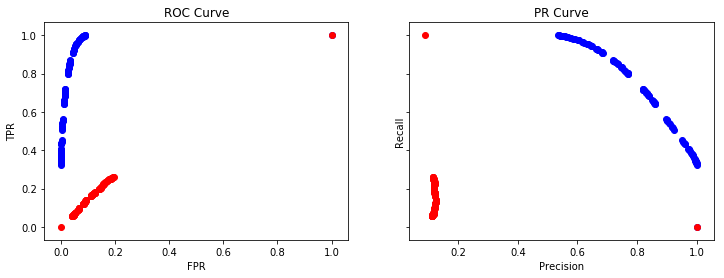

----- k = 50 -----
Time elapsed (Training): 161.9097 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.942116
ROCAUC Score (Training): 0.971813
PRAUC Score (Training): 0.400965
Accuracy (Validation): 0.855795
ROCAUC Score (Validation): 0.537850
PRAUC Score (Validation): 0.062636
Time elapsed (Evaluation): 1.3506 s


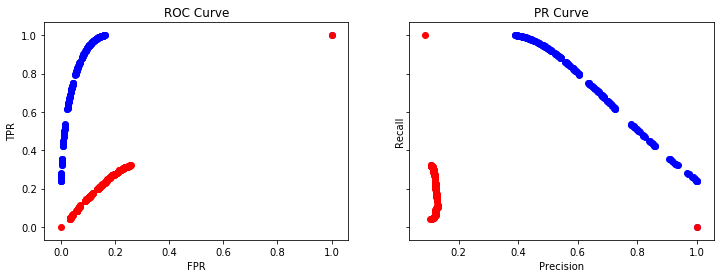

----- k = 100 -----
Time elapsed (Training): 156.5271 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.933133
ROCAUC Score (Training): 0.955137
PRAUC Score (Training): 0.400793
Accuracy (Validation): 0.869827
ROCAUC Score (Validation): 0.550513
PRAUC Score (Validation): 0.052978
Time elapsed (Evaluation): 1.2216 s


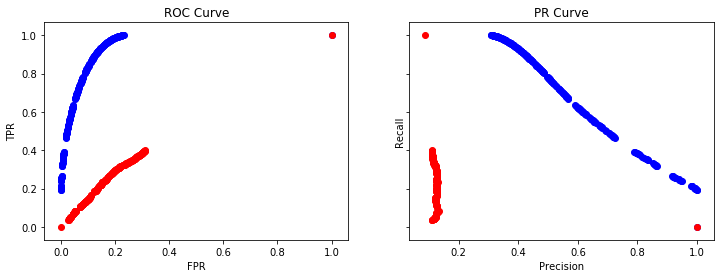

----- k = 200 -----
Time elapsed (Training): 154.4288 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=200,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.924279
ROCAUC Score (Training): 0.928846
PRAUC Score (Training): 0.371241
Accuracy (Validation): 0.882531
ROCAUC Score (Validation): 0.569108
PRAUC Score (Validation): 0.097283
Time elapsed (Evaluation): 1.2876 s


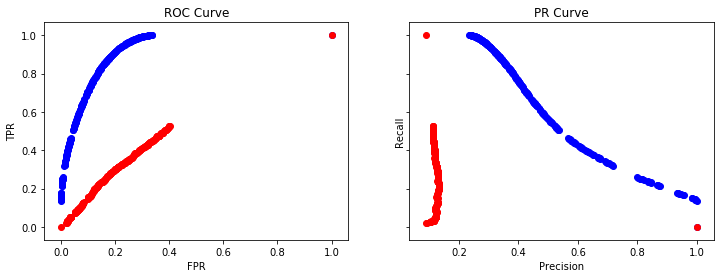

----- k = 500 -----
Time elapsed (Training): 138.0400 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.917026
ROCAUC Score (Training): 0.866253
PRAUC Score (Training): 0.321101
Accuracy (Validation): 0.895188
ROCAUC Score (Validation): 0.611602
PRAUC Score (Validation): 0.034875
Time elapsed (Evaluation): 1.2546 s


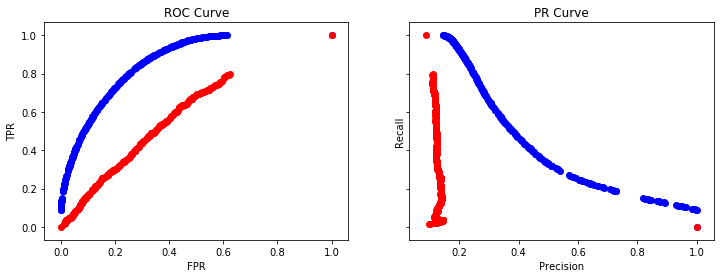

----- k = 1000 -----
Time elapsed (Training): 110.6038 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=1000,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.911408
ROCAUC Score (Training): 0.797546
PRAUC Score (Training): 0.222417
Accuracy (Validation): 0.904764
ROCAUC Score (Validation): 0.630370
PRAUC Score (Validation): 0.042587
Time elapsed (Evaluation): 1.1996 s


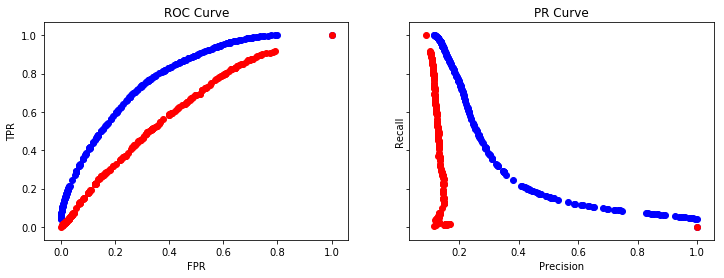

----- k = 2000 -----
Time elapsed (Training): 83.6244 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2000,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.908469
ROCAUC Score (Training): 0.746026
PRAUC Score (Training): 0.158320
Accuracy (Validation): 0.909078
ROCAUC Score (Validation): 0.649639
PRAUC Score (Validation): 0.040192
Time elapsed (Evaluation): 1.1716 s


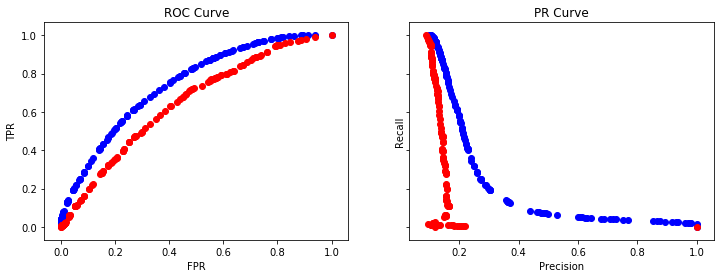

----- k = 5000 -----
Time elapsed (Training): 42.8704 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5000,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.906739
ROCAUC Score (Training): 0.691891
PRAUC Score (Training): 0.104197
Accuracy (Validation): 0.911116
ROCAUC Score (Validation): 0.658309
PRAUC Score (Validation): 0.091986
Time elapsed (Evaluation): 1.1336 s


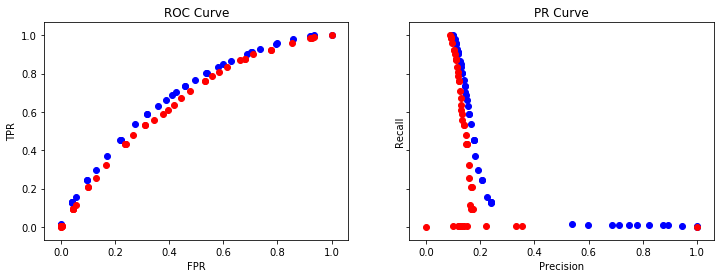

----- k = 10000 -----
Time elapsed (Training): 22.4468 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10000,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.906360
ROCAUC Score (Training): 0.670834
PRAUC Score (Training): 0.127657
Accuracy (Validation): 0.911970
ROCAUC Score (Validation): 0.659893
PRAUC Score (Validation): 0.103221
Time elapsed (Evaluation): 1.1876 s


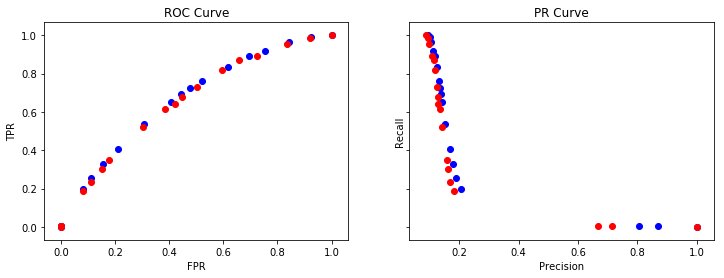

----- k = 20000 -----
Time elapsed (Training): 17.5384 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20000,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.906360
ROCAUC Score (Training): 0.651903
PRAUC Score (Training): 0.175881
Accuracy (Validation): 0.911970
ROCAUC Score (Validation): 0.648538
PRAUC Score (Validation): 0.135056
Time elapsed (Evaluation): 1.1596 s


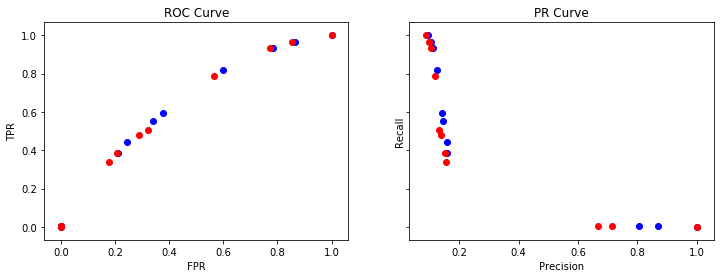

----- k = 50000 -----
Time elapsed (Training): 4.6165 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=50000,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.906099
ROCAUC Score (Training): 0.598906
PRAUC Score (Training): 0.317086
Accuracy (Validation): 0.911827
ROCAUC Score (Validation): 0.607797
PRAUC Score (Validation): 0.321483
Time elapsed (Evaluation): 1.0676 s


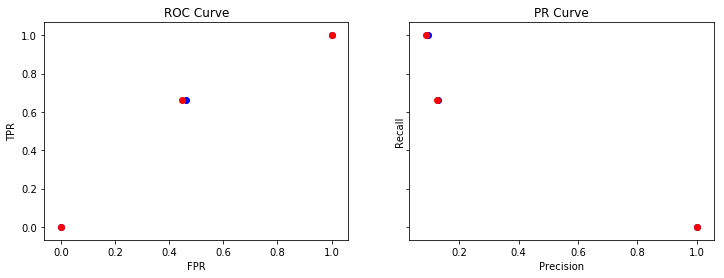

In [12]:
fit_times = []; eval_times = []; acc_scores = []; rocauc_scores = []; prauc_scores = []

for k in ks:
    print('----- k = %d -----' % k)
    clf = tree.DecisionTreeClassifier(min_samples_split=k)
    fit_time = utils.train_model(clf, X_train, y_train)
    acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)
    fit_times.append(fit_time); eval_times.append(eval_time)
    acc_scores.append(acc_score); rocauc_scores.append(rocauc_score); prauc_scores.append(prauc_score)

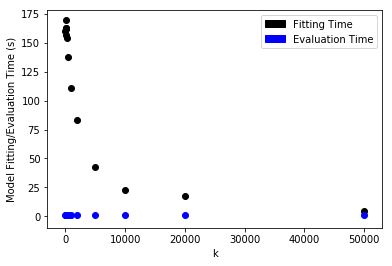

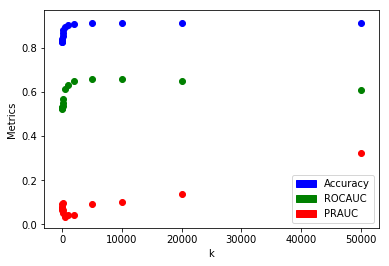

      0_k  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  5_eval_time
0       2    0.825456  0.525971  0.092181  160.060016     1.381576
1       5    0.828869  0.524429  0.077635  162.334819     1.288589
2      10    0.833041  0.526326  0.063187  162.840710     1.330577
3      20    0.838730  0.534205  0.075735  169.437025     1.229607
4      50    0.855795  0.537850  0.062636  161.909720     1.350571
5     100    0.869827  0.550513  0.052978  156.527135     1.221602
6     200    0.882531  0.569108  0.097283  154.428804     1.287588
7     500    0.895188  0.611602  0.034875  138.040024     1.254614
8    1000    0.904764  0.630370  0.042587  110.603766     1.199634
9    2000    0.909078  0.649639  0.040192   83.624376     1.171611
10   5000    0.911116  0.658309  0.091986   42.870357     1.133639
11  10000    0.911970  0.659893  0.103221   22.446849     1.187626
12  20000    0.911970  0.648538  0.135056   17.538411     1.159630
13  50000    0.911827  0.607797  0.321483    4.616544     1.06

In [13]:
utils.plot_metrics(ks, 'k', False, fit_times, eval_times, acc_scores, rocauc_scores, prauc_scores)

A larger __min_samples_split__ reduces the model complexity and overfitting. I got the best ROCAUC at __min_samples_split__=10000. The best value is likely to be somewhere between 5000 and 10000. Interestingly, PRAUC keeps increasing as __k__ goes up.

## Min Samples Leaf

Next, I will try __min_samples_leaf__, which is the minimum number of samples required to be at a leaf node.

In [14]:
ks = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000]

----- k = 1 -----
Time elapsed (Training): 160.6218 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 1.000000
ROCAUC Score (Training): 1.000000
PRAUC Score (Training): 0.000000
Accuracy (Validation): 0.822849
ROCAUC Score (Validation): 0.522113
PRAUC Score (Validation): 0.086813
Time elapsed (Evaluation): 1.2296 s


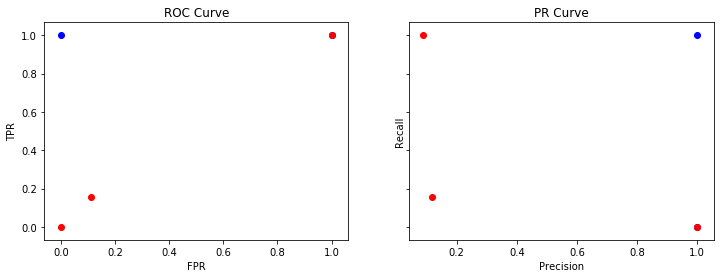

----- k = 2 -----
Time elapsed (Training): 135.9057 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.982045
ROCAUC Score (Training): 0.998061
PRAUC Score (Training): 0.143423
Accuracy (Validation): 0.842285
ROCAUC Score (Validation): 0.521902
PRAUC Score (Validation): 0.069733
Time elapsed (Evaluation): 1.2206 s


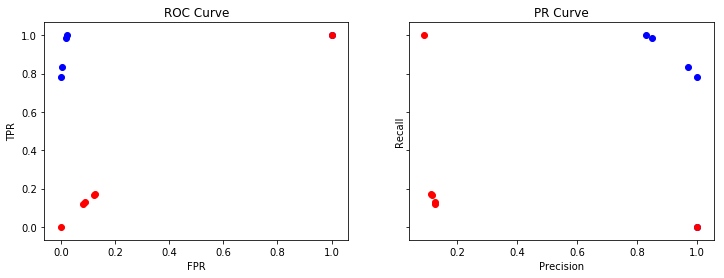

----- k = 5 -----
Time elapsed (Training): 108.8833 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.952925
ROCAUC Score (Training): 0.983125
PRAUC Score (Training): 0.316579
Accuracy (Validation): 0.850107
ROCAUC Score (Validation): 0.535527
PRAUC Score (Validation): 0.044451
Time elapsed (Evaluation): 1.2016 s


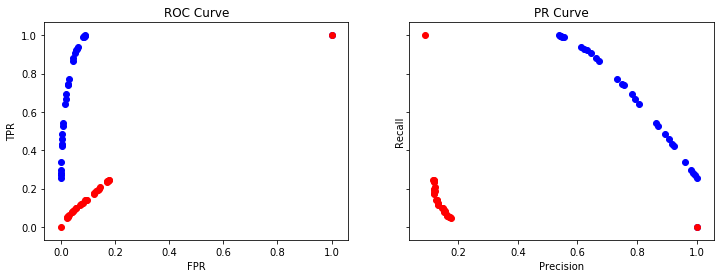

----- k = 10 -----
Time elapsed (Training): 89.8954 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.929613
ROCAUC Score (Training): 0.957956
PRAUC Score (Training): 0.315803
Accuracy (Validation): 0.867457
ROCAUC Score (Validation): 0.546409
PRAUC Score (Validation): 0.025058
Time elapsed (Evaluation): 1.2286 s


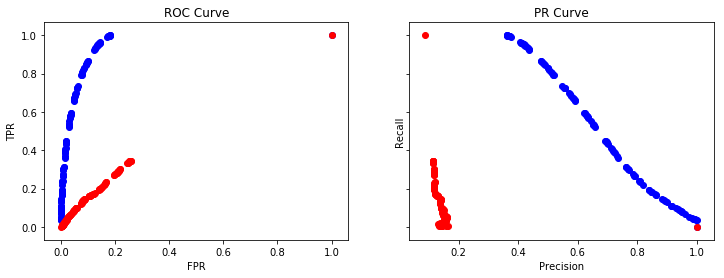

----- k = 20 -----
Time elapsed (Training): 75.9911 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.913885
ROCAUC Score (Training): 0.920515
PRAUC Score (Training): 0.253606
Accuracy (Validation): 0.889879
ROCAUC Score (Validation): 0.547508
PRAUC Score (Validation): 0.024408
Time elapsed (Evaluation): 1.1246 s


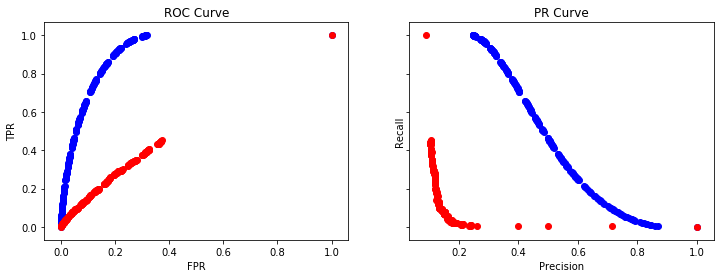

----- k = 50 -----
Time elapsed (Training): 61.6344 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.906703
ROCAUC Score (Training): 0.860000
PRAUC Score (Training): 0.190156
Accuracy (Validation): 0.906376
ROCAUC Score (Validation): 0.589888
PRAUC Score (Validation): 0.036932
Time elapsed (Evaluation): 1.1726 s


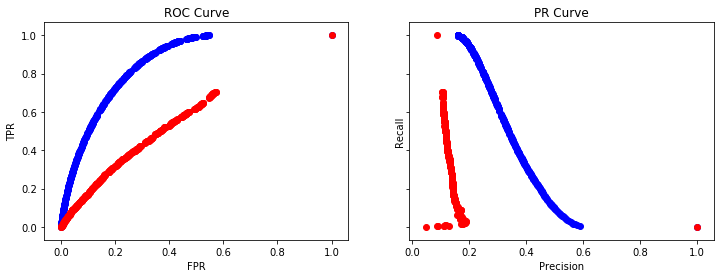

----- k = 100 -----
Time elapsed (Training): 51.4346 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.906099
ROCAUC Score (Training): 0.809416
PRAUC Score (Training): 0.148662
Accuracy (Validation): 0.911827
ROCAUC Score (Validation): 0.616471
PRAUC Score (Validation): 0.042649
Time elapsed (Evaluation): 1.1626 s


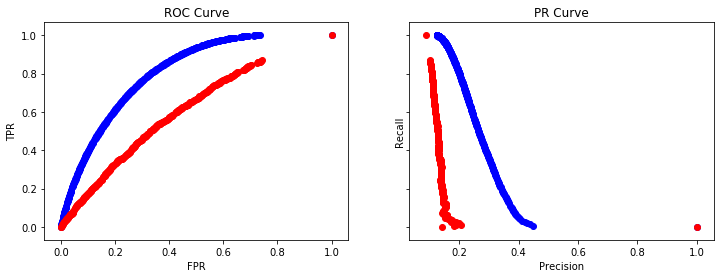

----- k = 200 -----
Time elapsed (Training): 43.4052 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=200, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.906099
ROCAUC Score (Training): 0.762359
PRAUC Score (Training): 0.123255
Accuracy (Validation): 0.911827
ROCAUC Score (Validation): 0.640709
PRAUC Score (Validation): 0.051592
Time elapsed (Evaluation): 1.1536 s


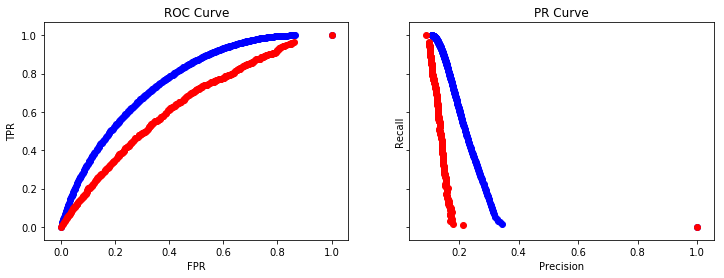

----- k = 500 -----
Time elapsed (Training): 35.1328 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=500, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.906099
ROCAUC Score (Training): 0.721404
PRAUC Score (Training): 0.102952
Accuracy (Validation): 0.911827
ROCAUC Score (Validation): 0.653483
PRAUC Score (Validation): 0.089592
Time elapsed (Evaluation): 1.1396 s


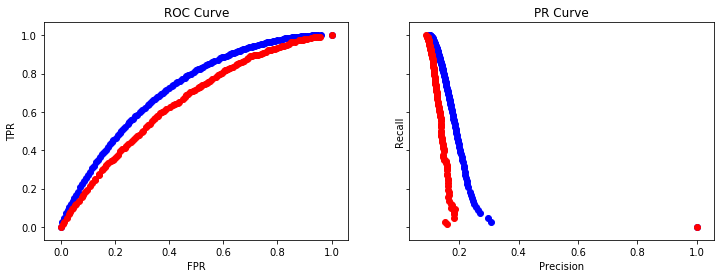

----- k = 1000 -----
Time elapsed (Training): 29.8025 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1000, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.906099
ROCAUC Score (Training): 0.699285
PRAUC Score (Training): 0.098419
Accuracy (Validation): 0.911827
ROCAUC Score (Validation): 0.666356
PRAUC Score (Validation): 0.132595
Time elapsed (Evaluation): 1.1576 s


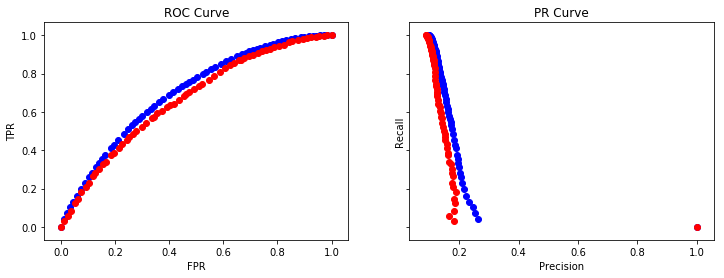

----- k = 2000 -----
Time elapsed (Training): 24.2323 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2000, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.906099
ROCAUC Score (Training): 0.682214
PRAUC Score (Training): 0.115488
Accuracy (Validation): 0.911827
ROCAUC Score (Validation): 0.663636
PRAUC Score (Validation): 0.133137
Time elapsed (Evaluation): 1.1117 s


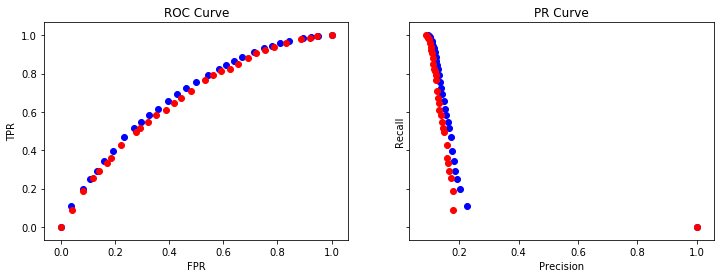

----- k = 5000 -----
Time elapsed (Training): 16.8876 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5000, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.906099
ROCAUC Score (Training): 0.661293
PRAUC Score (Training): 0.137408
Accuracy (Validation): 0.911827
ROCAUC Score (Validation): 0.659473
PRAUC Score (Validation): 0.127945
Time elapsed (Evaluation): 1.1616 s


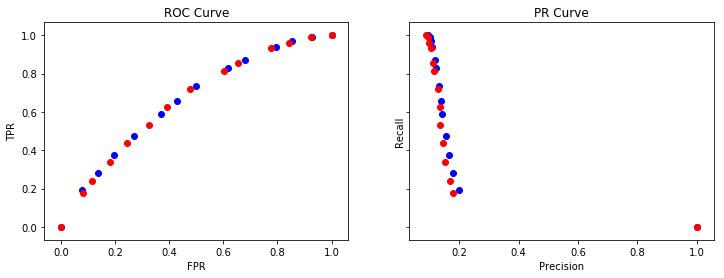

----- k = 10000 -----
Time elapsed (Training): 11.9032 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10000, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.906099
ROCAUC Score (Training): 0.648632
PRAUC Score (Training): 0.209385
Accuracy (Validation): 0.911827
ROCAUC Score (Validation): 0.653527
PRAUC Score (Validation): 0.190509
Time elapsed (Evaluation): 1.1756 s


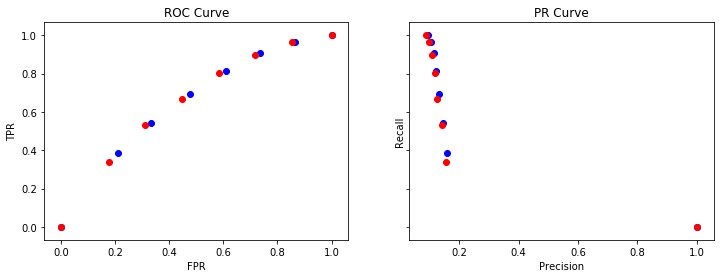

----- k = 20000 -----
Time elapsed (Training): 7.7715 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20000, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.906099
ROCAUC Score (Training): 0.632089
PRAUC Score (Training): 0.212668
Accuracy (Validation): 0.911827
ROCAUC Score (Validation): 0.638348
PRAUC Score (Validation): 0.194813
Time elapsed (Evaluation): 1.1296 s


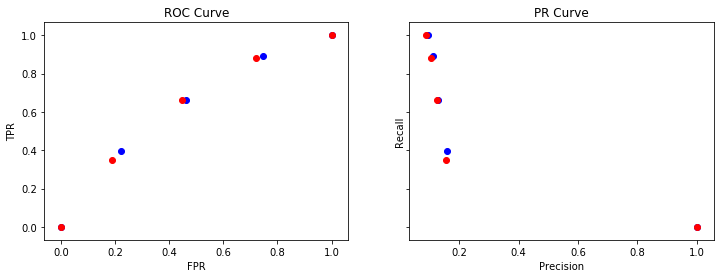

----- k = 50000 -----
Time elapsed (Training): 0.4229 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50000, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.906099
ROCAUC Score (Training): 0.500000
PRAUC Score (Training): 0.453049
Accuracy (Validation): 0.911827
ROCAUC Score (Validation): 0.500000
PRAUC Score (Validation): 0.455914
Time elapsed (Evaluation): 1.1036 s


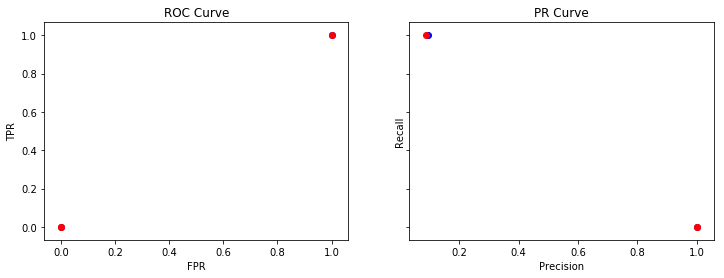

In [15]:
fit_times = []; eval_times = []; acc_scores = []; rocauc_scores = []; prauc_scores = []

for k in ks:
    print('----- k = %d -----' % k)
    clf = tree.DecisionTreeClassifier(min_samples_leaf=k)
    fit_time = utils.train_model(clf, X_train, y_train)
    acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)
    fit_times.append(fit_time); eval_times.append(eval_time)
    acc_scores.append(acc_score); rocauc_scores.append(rocauc_score); prauc_scores.append(prauc_score)

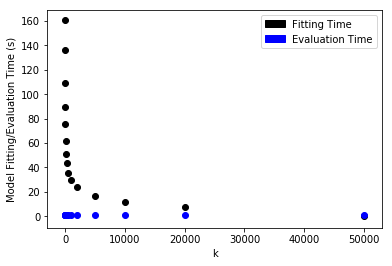

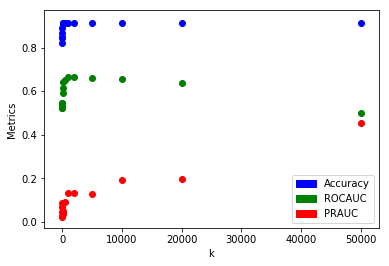

      0_k  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  5_eval_time
0       1    0.822849  0.522113  0.086813  160.621846     1.229609
1       2    0.842285  0.521902  0.069733  135.905705     1.220613
2       5    0.850107  0.535527  0.044451  108.883313     1.201618
3      10    0.867457  0.546409  0.025058   89.895362     1.228622
4      20    0.889879  0.547508  0.024408   75.991139     1.124642
5      50    0.906376  0.589888  0.036932   61.634382     1.172644
6     100    0.911827  0.616471  0.042649   51.434628     1.162615
7     200    0.911827  0.640709  0.051592   43.405186     1.153649
8     500    0.911827  0.653483  0.089592   35.132823     1.139624
9    1000    0.911827  0.666356  0.132595   29.802507     1.157631
10   2000    0.911827  0.663636  0.133137   24.232293     1.111652
11   5000    0.911827  0.659473  0.127945   16.887633     1.161616
12  10000    0.911827  0.653527  0.190509   11.903223     1.175611
13  20000    0.911827  0.638348  0.194813    7.771524     1.12

In [16]:
utils.plot_metrics(ks, 'k', False, fit_times, eval_times, acc_scores, rocauc_scores, prauc_scores)

Similar to __min_samples_split__, a larger __min_samples_leaf__ also reduces the model complexity and overfitting. I got the best ROCAUC at __min_samples_leaf__=1000.

## Max Leaf Nodes

The last hyperparameter I will try is __max_leaf_nodes__. The trees grow by adding the best leaf nodes until the number of leaf nodes reaches this number.

In [17]:
ks = [2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000]

----- k = 2 -----
Time elapsed (Training): 9.4640 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=2, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
Accuracy (Training): 0.906099
ROCAUC Score (Training): 0.598906
PRAUC Score (Training): 0.317086
Accuracy (Validation): 0.911827
ROCAUC Score (Validation): 0.607797
PRAUC Score (Validation): 0.321483
Time elapsed (Evaluation): 1.1946 s


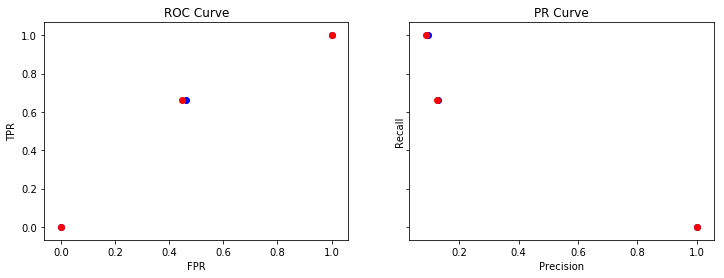

----- k = 5 -----
Time elapsed (Training): 15.4231 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
Accuracy (Training): 0.906300
ROCAUC Score (Training): 0.631829
PRAUC Score (Training): 0.184262
Accuracy (Validation): 0.911970
ROCAUC Score (Validation): 0.640027
PRAUC Score (Validation): 0.143134
Time elapsed (Evaluation): 1.1046 s


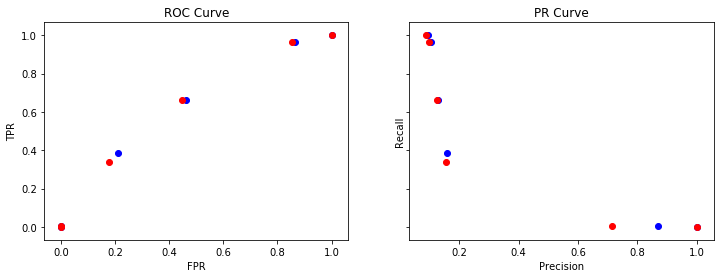

----- k = 10 -----
Time elapsed (Training): 21.0993 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.906300
ROCAUC Score (Training): 0.653595
PRAUC Score (Training): 0.129876
Accuracy (Validation): 0.911970
ROCAUC Score (Validation): 0.650644
PRAUC Score (Validation): 0.105521
Time elapsed (Evaluation): 1.1686 s


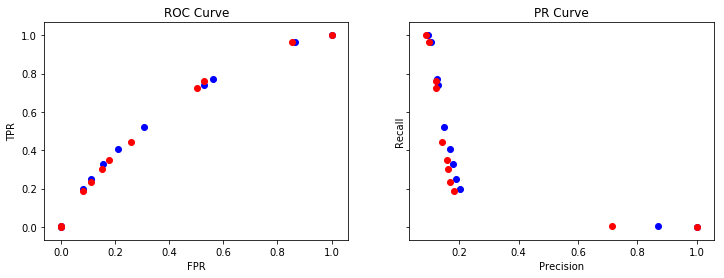

----- k = 20 -----
Time elapsed (Training): 26.9144 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.906360
ROCAUC Score (Training): 0.672658
PRAUC Score (Training): 0.089442
Accuracy (Validation): 0.911970
ROCAUC Score (Validation): 0.658961
PRAUC Score (Validation): 0.069202
Time elapsed (Evaluation): 1.1216 s


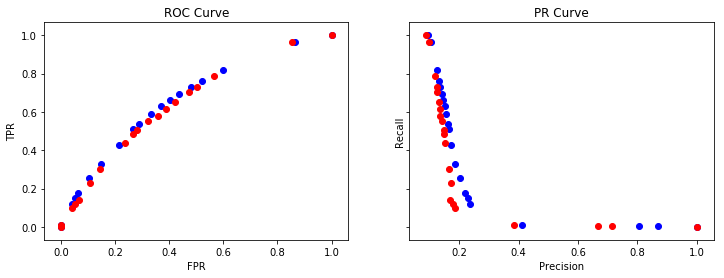

----- k = 50 -----
Time elapsed (Training): 32.5676 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=50,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.907509
ROCAUC Score (Training): 0.684268
PRAUC Score (Training): 0.108731
Accuracy (Validation): 0.910595
ROCAUC Score (Validation): 0.662114
PRAUC Score (Validation): 0.056760
Time elapsed (Evaluation): 1.1437 s


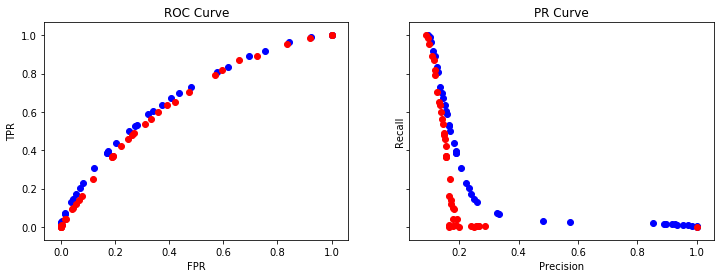

----- k = 100 -----
Time elapsed (Training): 35.8686 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=100,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.909500
ROCAUC Score (Training): 0.692173
PRAUC Score (Training): 0.141147
Accuracy (Validation): 0.909125
ROCAUC Score (Validation): 0.663080
PRAUC Score (Validation): 0.060620
Time elapsed (Evaluation): 1.1377 s


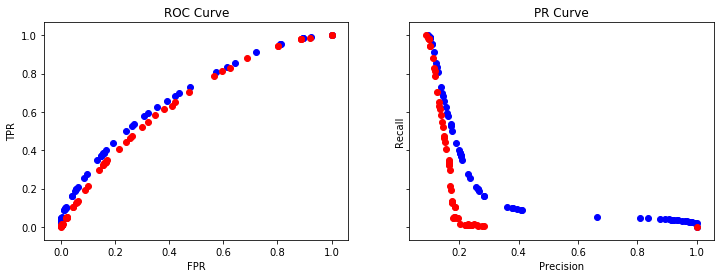

----- k = 200 -----
Time elapsed (Training): 40.1402 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=200,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.913589
ROCAUC Score (Training): 0.705519
PRAUC Score (Training): 0.192577
Accuracy (Validation): 0.906897
ROCAUC Score (Validation): 0.663023
PRAUC Score (Validation): 0.063511
Time elapsed (Evaluation): 1.1716 s


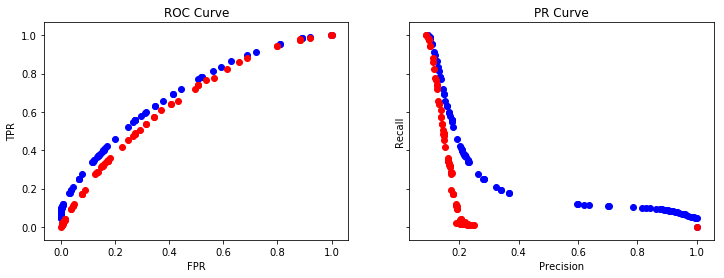

----- k = 500 -----
Time elapsed (Training): 49.0624 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=500,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.923402
ROCAUC Score (Training): 0.739031
PRAUC Score (Training): 0.299300
Accuracy (Validation): 0.898317
ROCAUC Score (Validation): 0.655250
PRAUC Score (Validation): 0.067534
Time elapsed (Evaluation): 1.1406 s


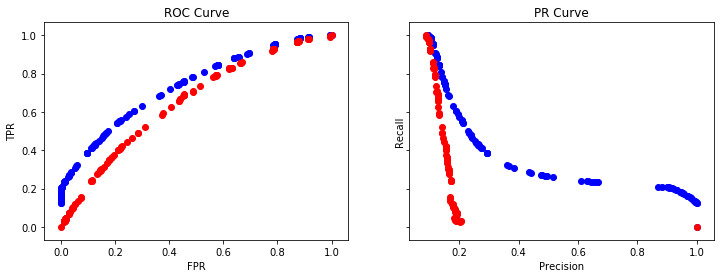

----- k = 1000 -----
Time elapsed (Training): 58.4604 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=1000,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.937802
ROCAUC Score (Training): 0.772780
PRAUC Score (Training): 0.423335
Accuracy (Validation): 0.887414
ROCAUC Score (Validation): 0.625183
PRAUC Score (Validation): 0.063203
Time elapsed (Evaluation): 1.1206 s


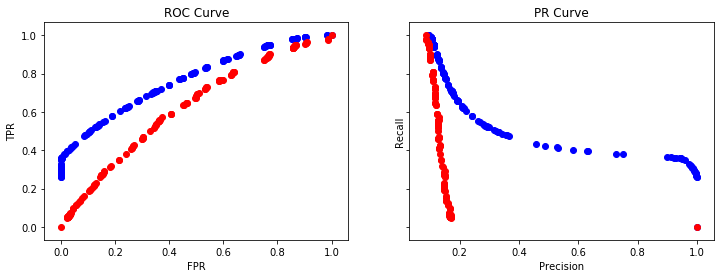

----- k = 2000 -----
Time elapsed (Training): 80.7183 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=2000,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.958140
ROCAUC Score (Training): 0.858736
PRAUC Score (Training): 0.599207
Accuracy (Validation): 0.866651
ROCAUC Score (Validation): 0.555080
PRAUC Score (Validation): 0.060221
Time elapsed (Evaluation): 1.2286 s


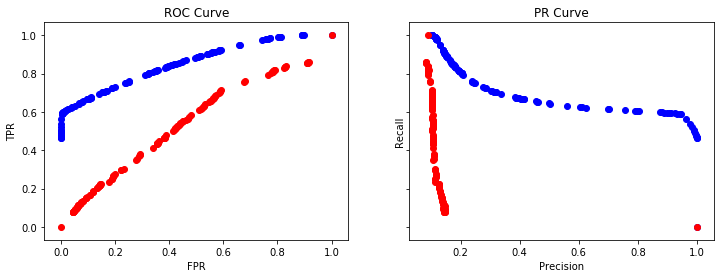

----- k = 5000 -----
Time elapsed (Training): 149.4964 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=5000,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.993553
ROCAUC Score (Training): 0.983794
PRAUC Score (Training): 0.817300
Accuracy (Validation): 0.834463
ROCAUC Score (Validation): 0.456425
PRAUC Score (Validation): 0.077283
Time elapsed (Evaluation): 1.2276 s


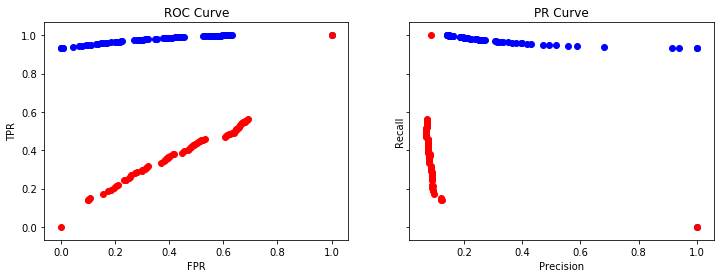

In [18]:
fit_times = []; eval_times = []; acc_scores = []; rocauc_scores = []; prauc_scores = []

for k in ks:
    print('----- k = %d -----' % k)
    clf = tree.DecisionTreeClassifier(max_leaf_nodes=k)
    fit_time = utils.train_model(clf, X_train, y_train)
    acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)
    fit_times.append(fit_time); eval_times.append(eval_time)
    acc_scores.append(acc_score); rocauc_scores.append(rocauc_score); prauc_scores.append(prauc_score)

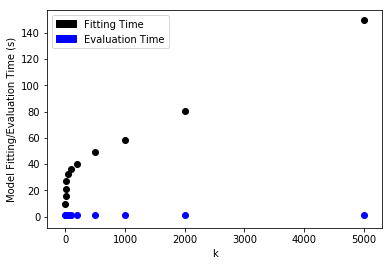

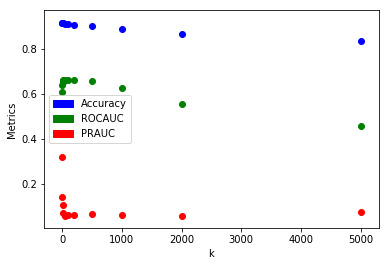

     0_k  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  5_eval_time
0      2    0.911827  0.607797  0.321483    9.463985     1.194637
1      5    0.911970  0.640027  0.143134   15.423105     1.104635
2     10    0.911970  0.650644  0.105521   21.099293     1.168613
3     20    0.911970  0.658961  0.069202   26.914426     1.121643
4     50    0.910595  0.662114  0.056760   32.567624     1.143650
5    100    0.909125  0.663080  0.060620   35.868567     1.137651
6    200    0.906897  0.663023  0.063511   40.140212     1.171640
7    500    0.898317  0.655250  0.067534   49.062385     1.140624
8   1000    0.887414  0.625183  0.063203   58.460374     1.120644
9   2000    0.866651  0.555080  0.060221   80.718299     1.228592
10  5000    0.834463  0.456425  0.077283  149.496376     1.227608


               0_k  1_Accuracy   2_ROCAUC    3_PRAUC  4_fit_time  5_eval_time
count    11.000000   11.000000  11.000000  11.000000   11.000000    11.000000
mean    807.909091    0.896473   0.621598   0.0989

In [19]:
utils.plot_metrics(ks, 'k', False, fit_times, eval_times, acc_scores, rocauc_scores, prauc_scores)

I am able to achieve ROCAUCs around 0.66 with all four methods.